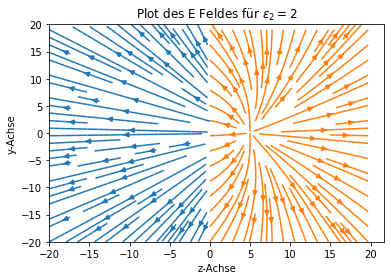

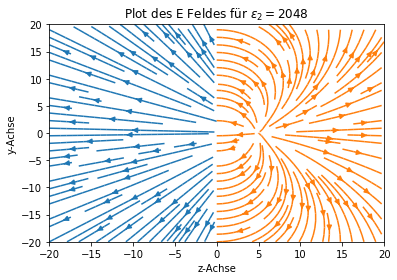

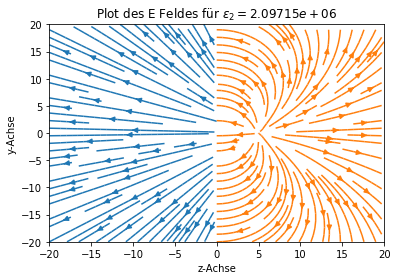

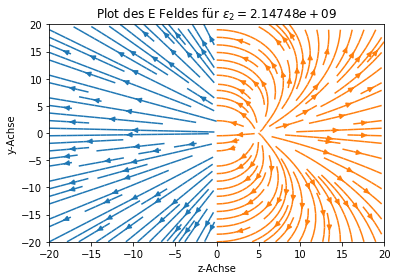

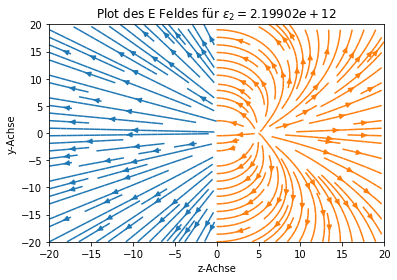

In [2]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = np.array([2**n for n in range(1, 50, 10)])

q = 1 #Da q frei zu definieren ist, wähle ich einfach 1
d = 5 # -||-
e0 = 8.85e-12


def phi1(y, z, e):
    """
    Funktion für z<0.
    Definiere die Konstanten mit e=epsilon2
    """
    k = 1/(4*np.pi*e0*e)
    q2 = q*2*e/(1+e)
    return k*q2*1/np.sqrt(y**2+(z-d)**2)

def phi2(y, z, e):
    """
    Funktion für z>0
    """
    k = 1/(4*np.pi*e0)
    q1 = (1-e)/(e+1)*q
    return k*(q/np.sqrt(y**2+(z-d)**2) + q1/np.sqrt(y**2+(z+d)**2))
    

"""
Definiere Meshgrid für z<0
"""
y1 = np.linspace(-20, 20, 100)
z1 = np.linspace(-20, 0, 50)

rz1, ry1 = np.meshgrid(z1, y1)
    
"""
Definiere Meshgrid für z>0
"""
y2 = np.linspace(-20, 20, 100)
z2 = np.linspace(0, 20, 50)

rz2, ry2 = np.meshgrid(z2, y2)




for i in epsilon:
    """
    Elektrische Felder
    """
    Ey1, Ez1  = np.gradient(phi1(ry1, rz1, i))
    Ey2, Ez2  = np.gradient(phi2(ry2, rz2, i))

    Ey1 *= -1
    Ez1 *= -1
    Ey2 *= -1
    Ez2 *= -1
    
    """
    Plots
    """
    
    plt.streamplot(rz1, ry1, Ez1, Ey1)
    plt.streamplot(rz2, ry2, Ez2, Ey2)
    plt.title(r"Plot des E Feldes für $\epsilon_2 = %g$" % i)
    plt.xlabel("z-Achse")
    plt.ylabel("y-Achse")
    
    
    
    plt.show()



In [21]:
print(epsilon)

[    1    10   100  1000 10000]
